In [1]:
import eval_algos
import helper_functions as hf
import rank_eval_pipeline as rep
import numpy as np

import matplotlib.pyplot as plt

import importlib

In [2]:
singles, first_gen = eval_algos.get_ground_truths_ordered()
random_baseline = hf.get_true_baseline()

In [3]:
RE = rep.RankEval("", "")
RE.ranking = first_gen.index
RE.scores = first_gen.values
RE.evaluate_ranking()

In [4]:
first_gen_vs_singles = RE.eval_res_singles
print(RE.eval_res_singles)
print(RE.eval_res_first_gen)

([1.0, 1.0, 1.0, 0.6, 0.42857142857142855, 0.3333333333333333, 0.2727272727272727, 0.23076923076923078, 0.2, 0.17647058823529413, 0.15789473684210525, 0.14285714285714285, 0.13043478260869565, 0.16666666666666666, 0.2, 0.18518518518518517, 0.1724137931034483, 0.16129032258064516, 0.22580645161290322, 0.25, 0.23529411764705882, 0.2571428571428571, 0.2777777777777778, 0.2631578947368421, 0.25, 0.23809523809523808, 0.2558139534883721, 0.2727272727272727, 0.28888888888888886, 0.30434782608695654, 0.3191489361702128, 0.30612244897959184, 0.29411764705882354, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.34545454545454546, 0.35714285714285715, 0.3684210526315789, 0.3559322033898305, 0.36666666666666664, 0.3770491803278688, 0.4098360655737705, 0.3968253968253968, 0.40625, 0.4153846153846154, 0.40298507462686567, 0.4117647058823529, 0.4411764705882353, 0.4492753623188406, 0.45714285714285713, 0.4647887323943662, 0.4722222222222222, 0.5, 0.5068493150684932, 0.5135135135135135, 

In [5]:
RE = rep.RankEval("", "")
RE.ranking = singles.index
RE.scores = singles.values
RE.evaluate_ranking()

In [6]:
singles_vs_first_gen = RE.eval_res_first_gen
print(RE.eval_res_singles)
print(RE.eval_res_first_gen)

([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 1.0)
([1.0, 1.0, 1.0, 0.6, 0.42857142857142855, 0.3333333333333333, 0.2727272727272727, 0.23076923076923078, 0.2, 0.17647058823529413, 0.15789473684210525, 0.14285714285714285, 0.13043478260869565, 0.16666666666666666, 0.2, 0.18518518518518517, 0.1724137931034483, 0.16129032258064516, 0.22580645161290322, 0.25, 0.23529411764705882, 0.2571428571428571, 0.2777777777777778, 0.2631578947368421, 0.25, 0.23809523809523808, 0.2558139534883721, 0.2727272727272727, 0.28888888888888886, 0.3043478260869

In [7]:
def plot(jaccard_scores_list, random_baseline, title=None):
    k_list = range(1, 101)

    fig, ax = plt.subplots(figsize=(8, 6))

    colorblind_colors = ['#E69F00', '#56B4E9', '#009E73', '#D55E00', '#F0E442', '#0072B2', '#CC79A7']
    linestyles = ['-', '--', ':', '-.', (0, (1, 1)), (0, (3, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1))]

    for idx, ranking_results in enumerate(jaccard_scores_list):
        ax.plot(ranking_results,
                color=colorblind_colors[idx % len(colorblind_colors)], linestyle=linestyles[idx % len(linestyles)])

    if isinstance(random_baseline[0], tuple):
        random_mean_list, random_ci_low_list, random_ci_high_list = random_baseline
    else:
        random_mean_list = random_baseline
        random_ci_low_list = random_baseline
        random_ci_high_list = random_baseline

    ax.plot(random_mean_list, label='random ranking', color='grey')
    x = [k - 1 for k in k_list]
    ax.fill_between(x, random_ci_low_list, random_ci_high_list, alpha=0.2, color='grey')

    ax.set_title(title, fontsize=20)
    ax.set_xlabel('k')
    ax.set_ylabel('Jaccard score')

    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)

    ax.xaxis.set_ticks(np.arange(0, 101, 20))
    ax.xaxis.set_ticklabels(['1', '20', '40', '60', '80', '100'])

    ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    ax.legend(loc='lower right', prop={'size': 15})

    plt.tight_layout()
    plt.show()



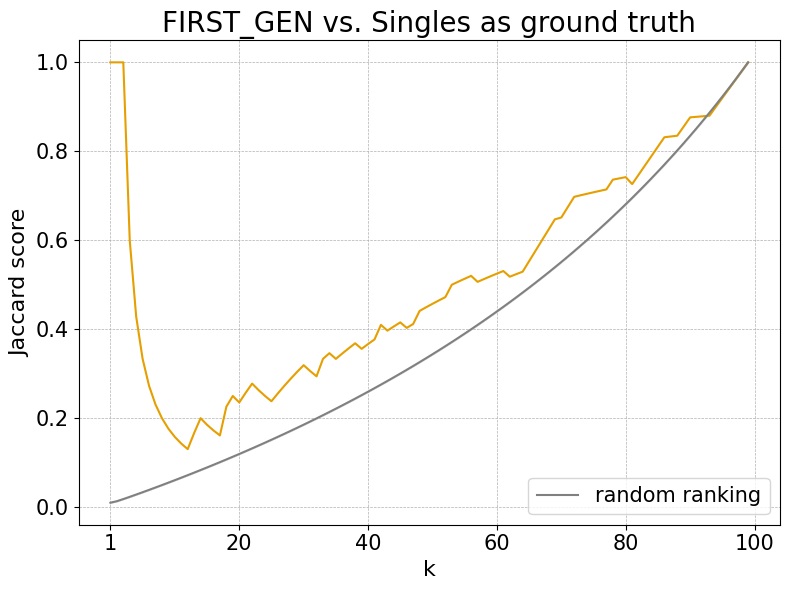

In [16]:
plot([first_gen_vs_singles[0]], random_baseline, title='FIRST_GEN vs. Singles as ground truth')

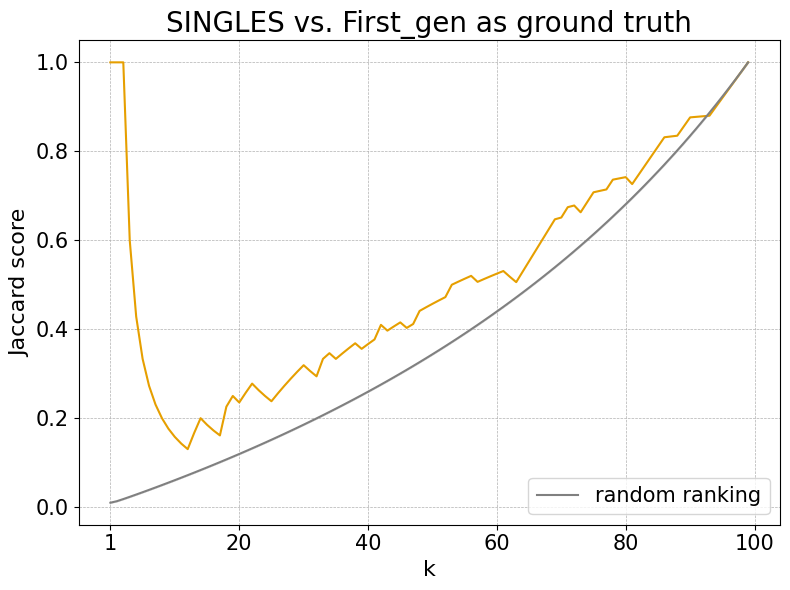

In [17]:
plot([singles_vs_first_gen[0]], random_baseline, title='SINGLES vs. First_gen as ground truth')

### Reverse ranking

In [10]:
RE = rep.RankEval("", "")
# reverse order of first_gen.index
RE.ranking = first_gen.index
RE.scores = first_gen.values[::-1]
RE.evaluate_ranking()

In [11]:
first_gen_reversed = RE.eval_res_first_gen
print(RE.eval_res_singles)
print(RE.eval_res_first_gen)

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.030303030303030304, 0.02857142857142857, 0.02702702702702703, 0.02564102564102564, 0.024390243902439025, 0.023255813953488372, 0.045454545454545456, 0.06666666666666667, 0.08695652173913043, 0.10638297872340426, 0.125, 0.14285714285714285, 0.13725490196078433, 0.1320754716981132, 0.12727272727272726, 0.12280701754385964, 0.11864406779661017, 0.11475409836065574, 0.1111111111111111, 0.125, 0.13846153846153847, 0.13432835820895522, 0.14705882352941177, 0.15942028985507245, 0.15492957746478872, 0.1506849315068493, 0.14666666666666667, 0.15789473684210525, 0.18421052631578946, 0.19480519480519481, 0.20512820512820512, 0.21518987341772153, 0.225, 0.2345679012345679, 0.24390243902439024, 0.2682926829268293, 0.27710843373493976, 0.2857142857142857, 0.30952380952380953, 0.3333333333333333, 0.32558139534883723, 0.3488372093023256, 0.3409090909090909, 0.3333333333333333, 0.34065934065934067, 0.3626373626373626, 0

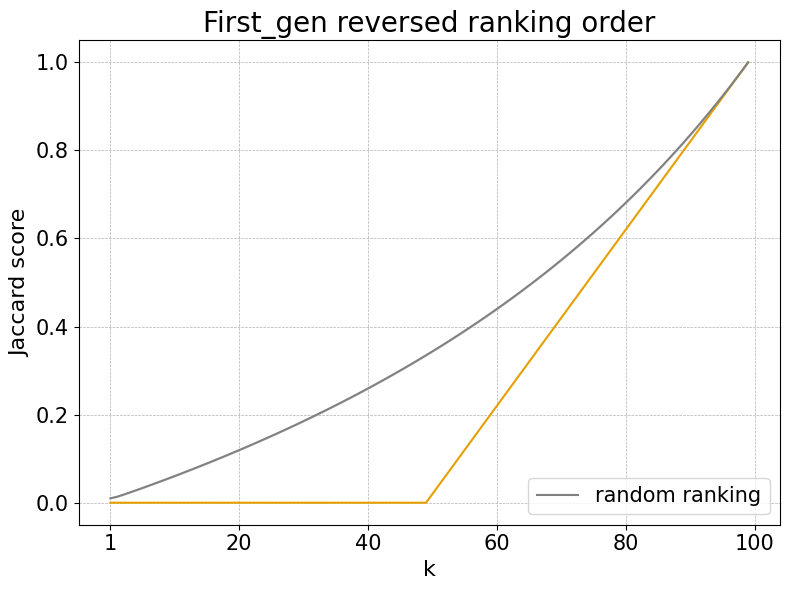

In [12]:
plot([first_gen_reversed[0]], random_baseline, title='First_gen reversed ranking order')